In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## ANALYSIS, FORECAST AND VISUALIZATION  OF ENERGY METRICES AND BALANCES

# I. About the dataset

- We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

https://sielac.olade.org/

data here: https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx

- The calculations for data processing base on the **Manual Olade 2011**

https://github.com/NamNguyen2015/TFM/blob/main/reference_documents/Manual%20Olade%202011.pdf

### Scope of work:

**a. Background and rationale**
        
Energy matrices are important tools in the field of energy planning and analysis. They provide a comprehensive overview of energy sources, consumption, and related factors within a particular region or system. They serve various purposes, including:
    
    • Allow policy makers to formulate and implement affective measures.
    
    • Help identify energy inefficiencies.
    
    • Play a crucial role in assessing the environmental impact of different energy sources.
    
**b. Approach and methodology**

The objective is to assess the evolution of an energy matrix for a specific country or region over time and develop a mid-term projection. In this context, data analysis plays a crucial role by:

    • Collecting and organizing the data in a structured format, ensuring its quality and consistency. This step is vital to establish a reliable foundation for further analysis.
    
    • Performing exploratory data analysis (EDA) to gain a preliminary understanding of the data. EDA helps uncover patterns, trends, and relationships within the energy matrix dataset. It provides insights into the variables at hand and informs subsequent analytical steps.
   
    • Building indicators to effectively evaluate and analyse the energy matrices. These indicators serve as measurable metrics that reflect specific aspects of the energy system, facilitating meaningful comparisons and assessments.
   
    • Developing a mid-term projection of the energy matrix using suitable machine learning algorithms and econometric techniques. By using historical data, economic and demographic projections, and applying appropriate modelling techniques, it is possible to project future trends in the energy matrix. These projections provide valuable insights into potential changes in energy sources, consumption patterns, and related factors. Decision-makers can utilize this information to formulate effective strategies and policies for the future, aiming for a more sustainable and resilient energy system.
    
    • Constructing visualizations such as Sankey charts and other relevant figures to analyse the energy matrices and present key information.1 Visual representations enhance the comprehension and communication of complex data, enabling stakeholders to grasp trends, interconnections, and potential areas for improvement more easily.


## I.1 Load the dataset

In [2]:
# Load the file
import requests
from io import BytesIO
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
url="https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx"

#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)


# Create a new dictionary to store modified dataframes
modified_dict = {}

for k, df in Dict.items():
    # Round the values of each column in the dataframe with 2 decimals
    df = df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

    # Ignore the first row (unit) in each df
    df = df.iloc[1:]

    # Rename columns in df
    df.rename(columns={'Unnamed: 0': 'SECTOR', 'OTHER PRIMARY_x000d_\n': 'OTHER PRIMARY'}, inplace=True)

    # Remove space in column names and Sector names
    df.columns = df.columns.str.strip()
    df['SECTOR'] = df['SECTOR'].str.strip()

    # Rename in a row
    df['SECTOR'].replace({'COKE PLANTS AND BLAST FURNACES_x000d_': 'COKE PLANTS AND BLAST FURNACES'}, inplace=True)
    
    # fill nule values
    df=df.fillna(np.nan)

    # Convert the keys of Dict to only contain the year
    k_new = k.split(' - ')[0]
    df["YEAR"] = k_new

    # Change all column names to uppercase
    df.columns = df.columns.str.upper()

    # Store the modified dataframe in the new dictionary
    modified_dict[k_new] = df

# Update the original dictionary with the modified dataframes
Dict = modified_dict


print(Dict.keys())

#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


## I.2 Frist visualization of energy balance (Supply-Transformation-Adjustment-Consumption)

In [3]:
# Concatenate the data
for k in Dict.keys():    
     # Concatenate all DataFrames in Dict vertically
    df_concat = pd.concat(Dict.values(), ignore_index=True)
    df_concat.set_index("YEAR", inplace=True)
    df_concat.index = df_concat.index.astype(int)
    #df_concat.index = pd.to_datetime(df_concat.index, format='%Y')
    
df_concat.head()

SECTOR       OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  \
YEAR                                                                          
1970    PRODUCTION   8161.58      1102.24  1044.43      3421.52         NaN   
1970        IMPORT  17845.05          NaN  1358.47          NaN         NaN   
1970        EXPORT     65.05          NaN      NaN          NaN         NaN   
1970  STOCK CHANGE   -277.33          NaN  -167.52          NaN         NaN   
1970        UNUSED       NaN       922.22      NaN          NaN         NaN   

      NUCLEAR  FIREWOOD  SUGARCANE AND PRODUCTS  OTHER PRIMARY  ...  \
YEAR                                                            ...   
1970      NaN  31851.53                  3600.7         223.24  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL   COKE  CHARCOAL   GASES  \
YEAR                                                                     
1970            1307.21     5674.61   8399.23  55.18   1766.75  465.95   
1970               8.19         NaN       NaN  72.42       NaN     NaN   
1970             122.91       47.15    748.34    NaN       NaN     NaN   
1970             -54.86      -42.01    -69.03 -24.83       NaN     NaN   
1970                NaN         NaN       NaN    NaN       NaN   55.88   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970           321.73      886.77           31068.07  49405.24  
1970              NaN      368.92             937.48  20141.01  
1970              NaN         NaN             920.12    985.17  
1970            15.41      -53.93            -345.28   -790.13  
1970            50.45         NaN             106.33   1028.54  

[5 rows x 24 columns]

### Show the data summary over years

In [4]:
# Group by Year and SECTOR, and sum the TOTAL values
selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','ADJUSTMENT','FINAL CONSUMPTION']
df_summary=df_concat.copy()

#df_summary=df_summary.apply(lambda column: column.fillna(0))
df_summary=df_summary[df_summary['SECTOR'].isin(selected_SECTORS)]
df_summary = df_summary.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_summary = df_summary.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_summary = df_summary[selected_SECTORS]

# Display the resultdf_summary
df_summary.head()

SECTOR  TOTAL SUPPLY  TOTAL TRANSFORMATION  ADJUSTMENT  FINAL CONSUMPTION
YEAR                                                                     
1970        66742.40              -5422.47        1.85           58834.12
1971        70092.03              -5437.72        4.11           61691.69
1972        75111.33              -5936.88      -29.62           65995.12
1973        81963.44              -6488.78      -17.64           71692.86
1974        87628.20              -6959.24       25.71           76198.40

### Visualize the data summary

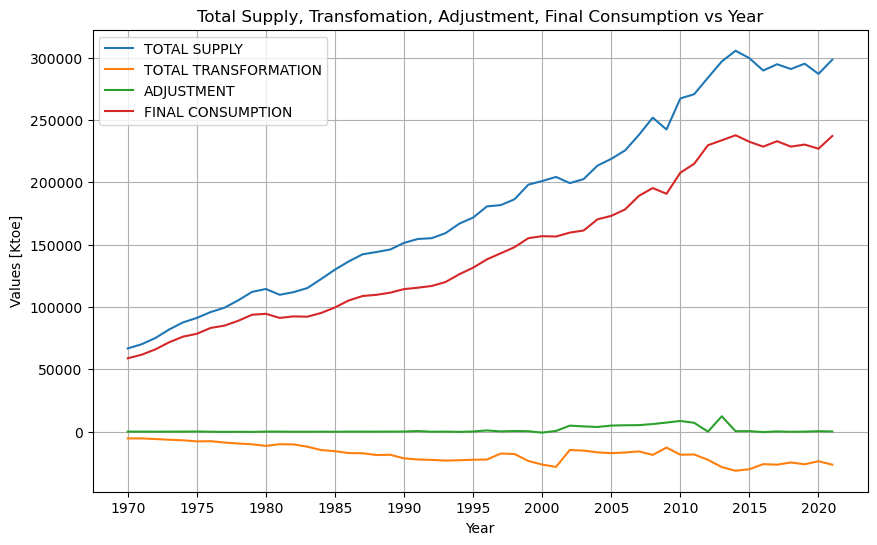

In [5]:
#selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','ADJUSTMENT','FINAL CONSUMPTION']
# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

#for k in selected_SECTORS:
 #   df_k=df_concat.loc[df_concat["SECTOR"]==k].drop(columns=["SECTOR"], axis=1)
  #  sns.lineplot(data=df_k, x=df_k.index, y='TOTAL', label=k, ax=ax)

for col in df_summary.columns:
    sns.lineplot(data=df_summary[col], x=df_summary.index, y=df_summary[col], label=col, ax=ax)
        
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel(f'Values [Ktoe]')
ax.set_title(f'Total Supply, Transfomation, Adjustment, Final Consumption vs Year')
ax.set_xticks(df_summary.index.unique()[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()




The negative transformation values over  years typically means that more energy was consumed or transformed within the energy system than was produced or input into the system during that specific time period (year). In other words, it indicates an energy deficit or a situation where the energy demands and transformations within the system exceeded the energy available from primary sources or imports.

## I.3 Sankey Diagram

- Sankey diagrams are valuable tools for visualizing energy flows and understanding energy balances in complex systems. 

- Reviewing Sankey diagrams in an energy balance context is crucial for gaining insights into energy flows, identifying inefficiencies, ensuring a balance between supply and demand, and making informed decisions about energy policy, efficiency improvements, and environmental management. They provide a concise and visually intuitive representation of complex energy data, making it easier for stakeholders to understand and act upon energy-related challenges and opportunities.

In [6]:
from collections import defaultdict
import plotly.graph_objects as go

### Define the Plot function

In [7]:
# Defining the Plot function
def Plot(year,db):
    label=db[year]["label"]
    source=db[year]["source"]
    target=db[year]["target"]
    value=db[year]["value"]
    color_nodes=db[year]["color_nodes"]
    color_links=db[year]["color_links"]
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 30,
          thickness = 20,
          line = None, # dict(color = "black", width = 0.5),
          label = label,
          color = color_nodes
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = value,
            color=color_links
      ))])

    fig.update_layout(title_text=year, font_size=10)
    fig.show()

#### Preparation the data to plot

In [8]:
# Preparation the data to plot
def Data_Generate(Dict):
    
    Dict_out = {}  # Initialize the output dictionary
    for sheet_name in Dict.keys():

        df=Dict[sheet_name]
        
         # Reset index
        df=df.set_index('SECTOR')

        # Transpose df
        df=df.T

        # Fill NaN values
        df=df.fillna(np.nan)
       

        # define the combinations
        Transformers=['REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
               'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
               'DISTILLERIES', 'OTHER CENTERS']
        Primaries=['OIL','NATURAL GAS','COAL','HYDROENERGY','GEOTHERMAL','NUCLEAR','FIREWOOD','SUGARCANE AND PRODUCTS','OTHER PRIMARY']
        Secondaries=['ELECTRICITY','LPG','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL','COKE','CHARCOAL','GASES','OTHER SECONDARY']
        Consumptions=['TRANSPORT','INDUSTRIAL','RESIDENTIAL','COMMERCIAL, SERVICES, PUBLIC','AGRICULTURE, FISHING AND MINING','CONSTRUCTION AND OTHERS']

        unique_combinations = []

        # here add secondary combination then type of consumption combination

        for i in Transformers:
            for j in Primaries:
                unique_combinations.append((j, i,abs(df[i][j])))

        for i in Transformers:
            for j in Secondaries:
                unique_combinations.append((i, j,abs(df[i][j])))

        # the final consumption column - Usage column
        for i in Consumptions:
            for j in Primaries+Secondaries:
                unique_combinations.append((j, i,abs(df[i][j])))
                
        label=Transformers+Primaries+Secondaries+Consumptions+Primaries+Secondaries
        
        #colors
        color_Transformers=['blue','yellow','green','orange','grey','grey','pink','cyan']
        color_Primaries=['black','orange','darkgray','lightblue','darkred','red','brown','darkgreen','khaki']
        color_Secondaries=['yellow','lightgreen','plum','plum','plum','grey','grey','grey','grey']
        color_Consumptions=['darkmagenta' for i in range(9)]
        color_nodes=color_Transformers+color_Primaries+color_Secondaries+color_Consumptions+color_Primaries+color_Secondaries
        
        # Rename the sheet_name to contain only year. Sample: "1970 - Brazil"--> "1970"
        sheet_name_new = sheet_name.split(' - ')[0]
    
        _dict=Dict_out[sheet_name_new]={}
        _dict["source"]=[]
        _dict["target"]=[]
        _dict["value"]=[]
        _dict["label"]=label
        _dict["color_nodes"]=color_nodes
        _dict["color_links"]=[]
        


        #Dict_out[sheet_name_new] = data  # Store the data in the dictionary
        for k in unique_combinations:
            _dict["source"].append(label.index(k[0]))
            _dict["target"].append(label.index(k[1]))
            _dict["value"].append(k[2])
            _dict["color_links"].append(color_nodes[label.index(k[0])])
    return Dict_out

In [9]:
db=Data_Generate(Dict)

### Sample plot

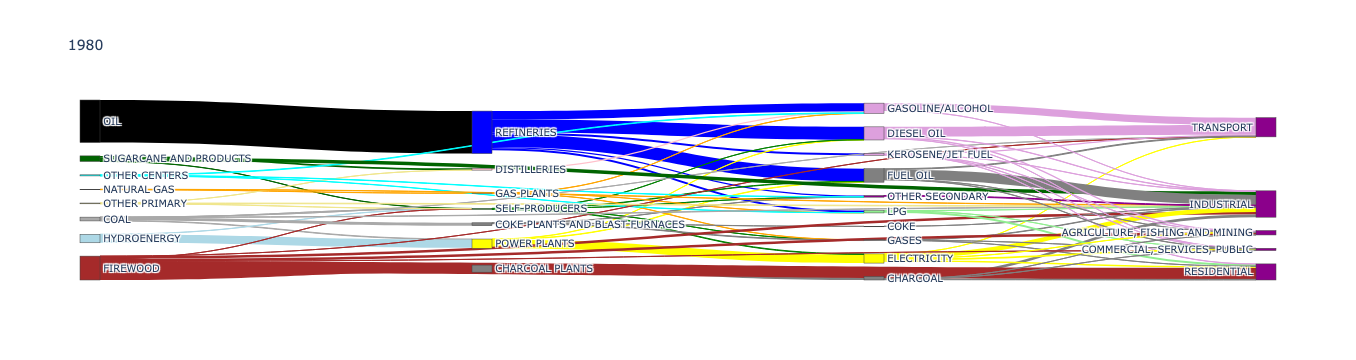

In [10]:
Plot(year='1980',db=db)

## II. DATA ANALYSIS CONSUMPTION



In [11]:
# Show the df final consumption:
df_C=df_concat.copy()

selected_SECTORS_C=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','FINAL CONSUMPTION']

df_C=df_C[df_C['SECTOR'].isin(selected_SECTORS_C)]
df_C = df_C.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_C = df_C.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_C = df_C[selected_SECTORS_C]

# Display the resultdf_summary
df_C.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     12661.99    16020.92     22075.66                       1266.80   
1971     13841.87    17454.73     22253.96                       1406.98   
1972     15633.22    19026.99     22440.87                       1570.69   
1973     18328.90    21493.43     22354.13                       1737.84   
1974     20105.68    23257.01     22316.70                       1873.46   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                            5351.01                     0.00   
1971                            5317.39                     0.00   
1972                            5338.47                     0.00   
1973                            5441.91                     0.00   
1974                            5376.38                     7.15   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                   1457.73           58834.12  
1971                   1416.75           61691.69  
1972                   1984.88           65995.12  
1973                   2336.65           71692.86  
1974                   3262.03           76198.40

In [12]:
# df_C_percentages calculate the percentages

df_C_percentages = (df_C.drop(columns=['FINAL CONSUMPTION']).div(df_C['FINAL CONSUMPTION'], axis=0) * 100)
df_C_percentages = df_C_percentages.round(0)

df_C_percentages.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION'],
      dtype='object', name='SECTOR')

In [13]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_C.drop(columns=["FINAL CONSUMPTION"])



### a- Show the line_plot:

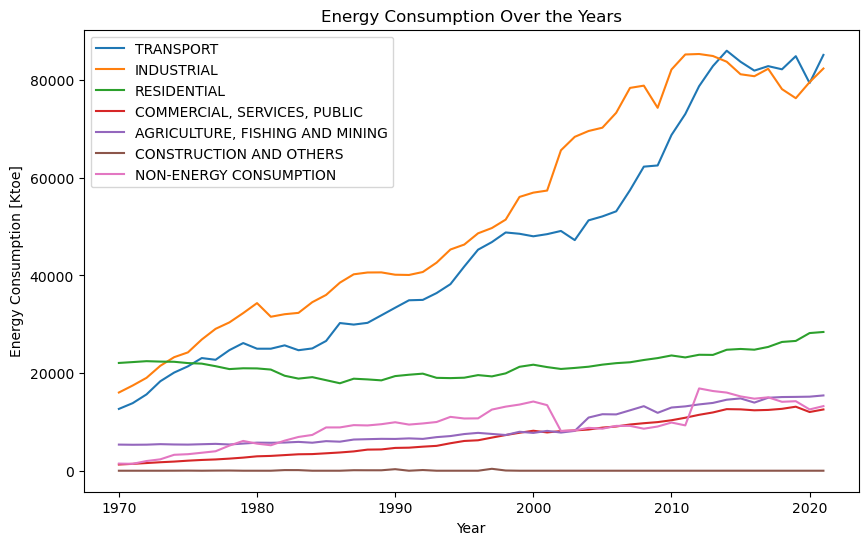

In [14]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Ktoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.show()

### b- Plot both stack plots side by side

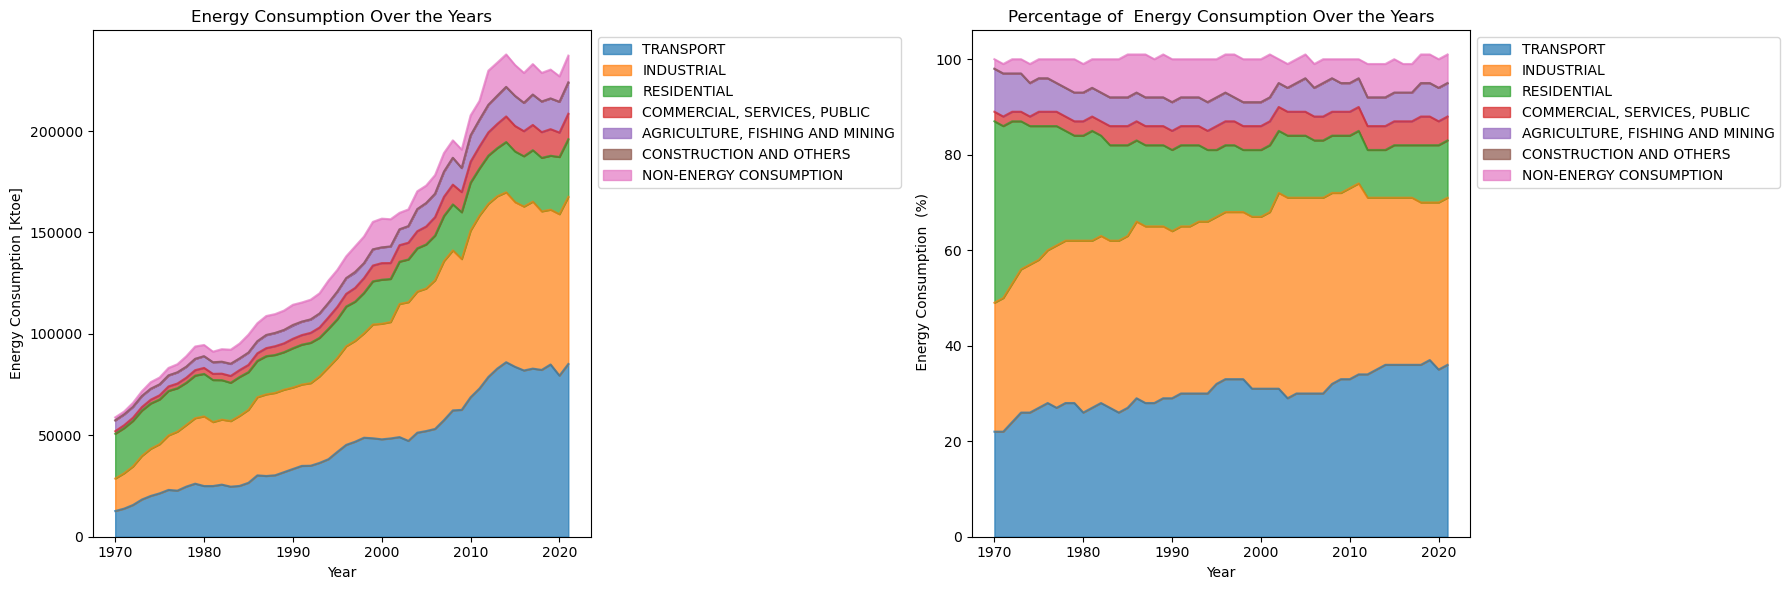

In [15]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Ktoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_C_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [16]:
#df_C.index = pd.to_datetime(df_C.index, format='%Y')
df_C.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'],
      dtype='object', name='SECTOR')

In [17]:

list_corr=df_C.columns.drop(['FINAL CONSUMPTION'])

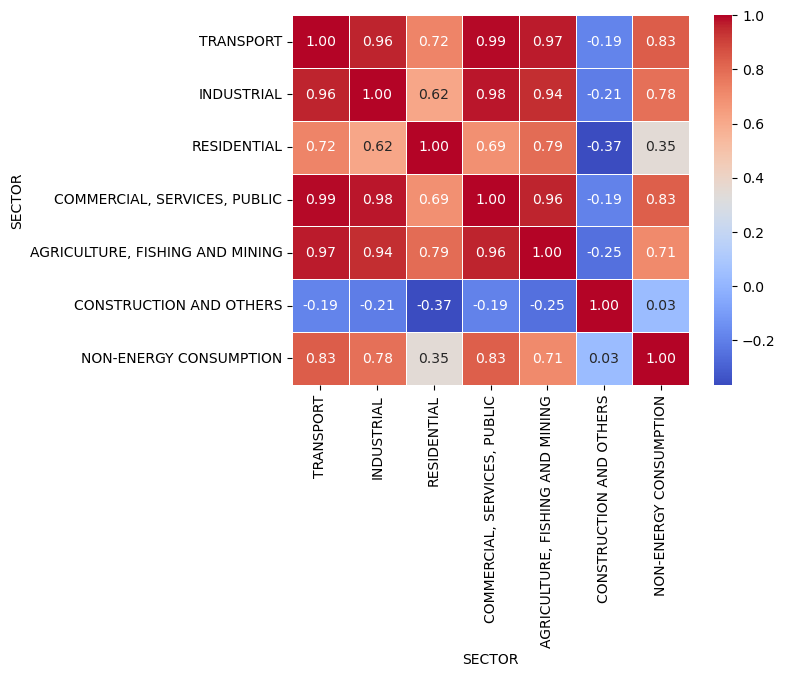

In [18]:

corr_mat = df_C[list_corr].corr()
sns.heatmap(corr_mat,annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()

From the correlation matrix, we can observe that the sector **'CONSTRUCTION AND OTHERS'** has a very low correlation with other sectors. We can consider dropping it if necessary.

In [19]:
df_C.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'],
      dtype='object', name='SECTOR')

## Scaled data

### MinMaxScaler
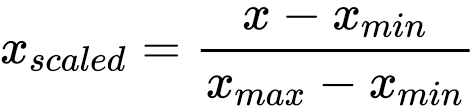

In [20]:
df_C.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     12661.99    16020.92     22075.66                       1266.80   
1971     13841.87    17454.73     22253.96                       1406.98   
1972     15633.22    19026.99     22440.87                       1570.69   
1973     18328.90    21493.43     22354.13                       1737.84   
1974     20105.68    23257.01     22316.70                       1873.46   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                            5351.01                     0.00   
1971                            5317.39                     0.00   
1972                            5338.47                     0.00   
1973                            5441.91                     0.00   
1974                            5376.38                     7.15   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                   1457.73           58834.12  
1971                   1416.75           61691.69  
1972                   1984.88           65995.12  
1973                   2336.65           71692.86  
1974                   3262.03           76198.40

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_C)
scaled_df = pd.DataFrame(scaled_data, columns=df_C.columns)
scaled_df.set_index(df_C.index, inplace=True)

In [22]:
scaled_df.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     0.000000    0.000000     0.395950                      0.000000   
1971     0.016081    0.020678     0.412922                      0.011833   
1972     0.040495    0.043352     0.430713                      0.025652   
1973     0.077235    0.078921     0.422457                      0.039761   
1974     0.101450    0.104355     0.418894                      0.051209   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                           0.003327                 0.000000   
1971                           0.000000                 0.000000   
1972                           0.002086                 0.000000   
1973                           0.012323                 0.000000   
1974                           0.005838                 0.018204   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                  0.002654           0.000000  
1971                  0.000000           0.015970  
1972                  0.036794           0.040021  
1973                  0.059575           0.071865  
1974                  0.119505           0.097046

### Running ARIMA

We apply the ARIMA model to all sectors, but first, we need to perform some checks to select the best parameters **(p, d, q)**.

In time series analysis, whether we need to scale the data (i.e., standardize or normalize it) depends on the specific characteristics of the data and the modeling techniques we plan to use. Scaling may or may not be required.

In this section, we are focusing on modeling the **univariate** problem, so **scaling is negligible**.

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score

In [24]:

# Split data into train and test sets 
train_size = int(len(df_C) * 0.80)

# Separate the data into 2 parts: training and validation
data_tr= df_C.iloc[:train_size]
data_val=df_C.iloc[train_size:]


In [25]:
data_tr.tail()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
2006     53138.32    73324.16     22034.81                       9060.76   
2007     57478.13    78418.45     22216.18                       9467.70   
2008     62289.25    78879.36     22681.60                       9732.39   
2009     62530.21    74338.79     23071.27                       9958.74   
2010     68765.74    82179.55     23610.56                      10339.55   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
2006                           11535.36                      0.0   
2007                           12375.19                      0.0   
2008                           13222.55                      0.0   
2009                           11860.91                      0.0   
2010                           12945.44                      0.0   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
2006                   9183.32          178276.74  
2007                   9185.24          189140.88  
2008                   8607.79          195412.94  
2009                   9054.90          190814.83  
2010                   9871.64          207712.48

In [26]:
#data_val.head()

In [27]:
#df_C.columns

### Prepare Functions

In [28]:
import warnings

# Suppress specific warning by category (e.g., FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error 

def MAPE(actual,forecast):
      # Ensure both DataFrames have the same shape
    if actual.shape != forecast.shape:
        raise ValueError("Input data shapes must match.")

    # Replace zero values in y_true with a small non-zero value to avoid division by zero
    actual = actual.replace(0, 1e-10)

    # Calculate the mean of absolute percentage errors 
    mape= round(abs((actual.to_numpy() - forecast.to_numpy()) / actual.to_numpy()).mean()*100,2)

    return mape

In [30]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

## II.1. Sample sector (TRANSPORT)- Mathematic background of ARIMA model

In [31]:
sector='TRANSPORT'
df_transport=scaled_df[[sector]]
df_transport.head()

SECTOR  TRANSPORT
YEAR             
1970     0.000000
1971     0.016081
1972     0.040495
1973     0.077235
1974     0.101450

In [32]:
# Train and Test data
df_tr=df_transport.iloc[:train_size]#train[['TRANSPORT']]
df_val=df_transport.iloc[train_size:]

### check stationary of the time series

In [33]:
test_stationarity(df_tr)

Results of Dickey-Fuller Test:
Test Statistic                  1.419910
p-value                         0.997203
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In this case, the p-value is almost  $1$, we can conclude that the data is not stationary.

**The next step, Partial Autocorrelation Function (PACF) is visualized.**

Showing the PACF is important in time series analysis because it helps in model selection, order determination, diagnosing the adequacy of a chosen model, and understanding the underlying autocorrelation structure of the data. 

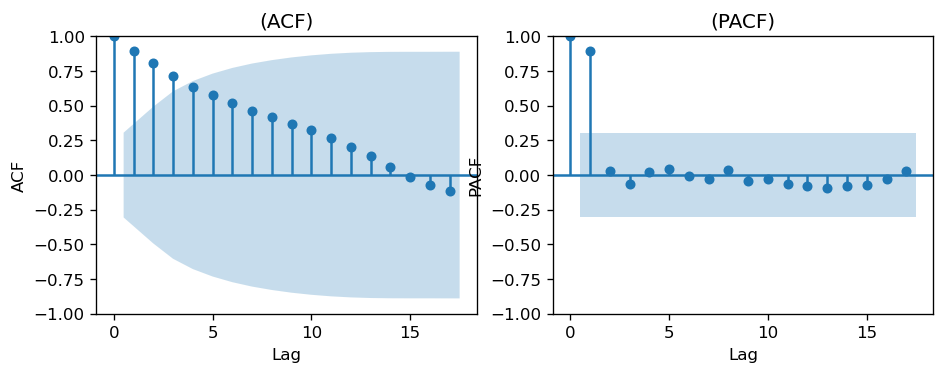

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

# Plot ACF
plot_acf(df_tr, ax=axes[0])
axes[0].set_title('(ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# Plot PACF
plot_pacf(df_tr, ax=axes[1], method='ywm')
axes[1].set_title('(PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.show()


### How to find the order of differencing (d) in ARIMA model

**Transform to stationary: differencing**

The value of **d** can be determined by finding the minimum number of differencing steps required to make the time series stationary.

In some cases, if the autocorrelations (ACF) are positive for many number of lags (10 or more), then the series needs further differencing.


### Take First Difference to Remove Trend

<AxesSubplot:xlabel='YEAR'>

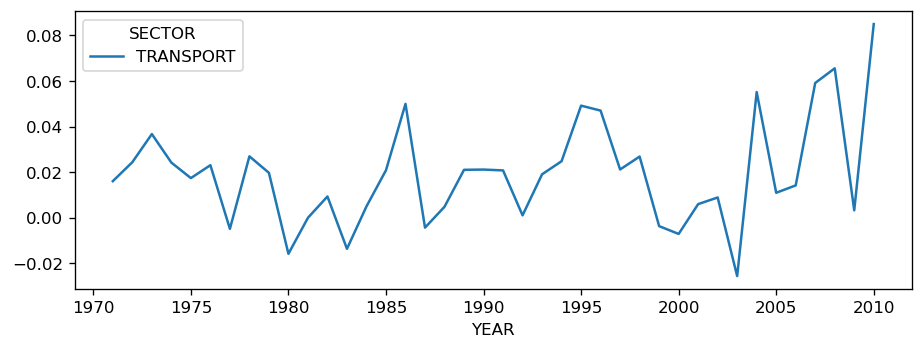

In [35]:
train_diff = df_tr.diff().dropna()
train_diff.plot()

In [36]:
#Test with diffencing data:
test_stationarity(train_diff)


Results of Dickey-Fuller Test:
Test Statistic                 -2.452644
p-value                         0.127426
#Lags Used                      4.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


p-value in the first differential is still greater than 0.05 so the second differential may need.

In [37]:
# Check the second differential:
train_diff_2=df_tr.diff().diff().dropna()
#train_diff_2.plot()


In [38]:
test_stationarity(train_diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -8.368694e+00
p-value                        2.698869e-13
#Lags Used                     1.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


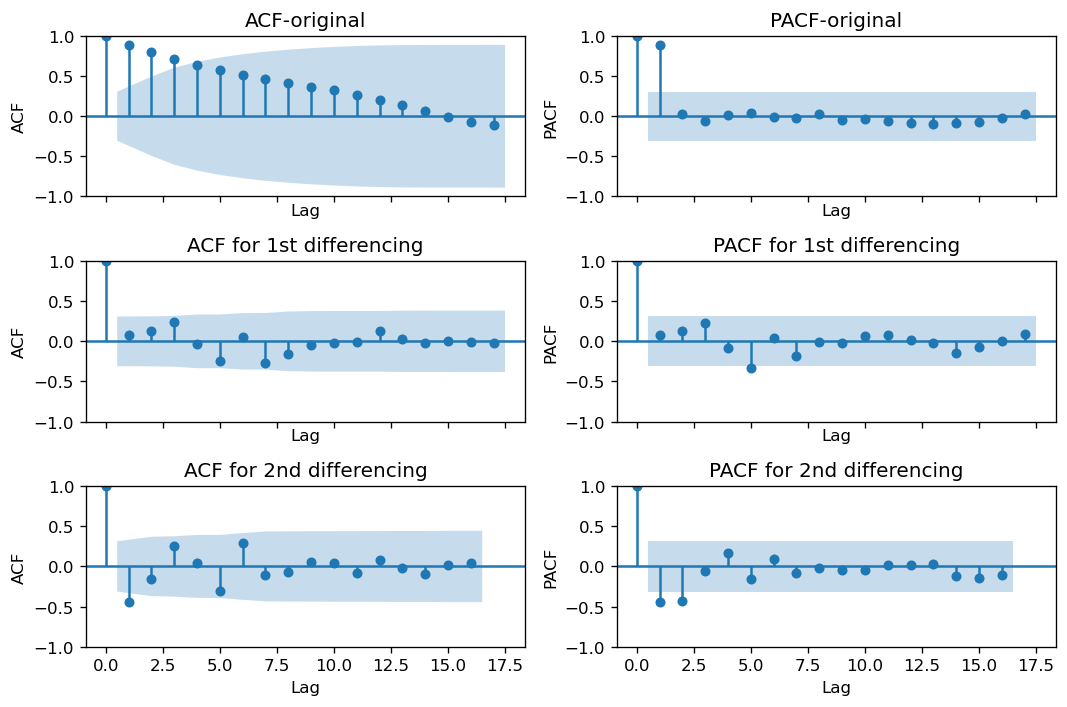

In [39]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize': (9, 6), 'figure.dpi': 120})

fig, axes = plt.subplots(3, 2, sharex=True)

# Plot ACF for original data
plot_acf(df_tr, ax=axes[0, 0])
axes[0, 0].set_title('ACF-original')
axes[0, 0].set_xlabel('Lag')
axes[0, 0].set_ylabel('ACF')

# Plot PACF for train
plot_pacf(df_tr, ax=axes[0, 1], method='ywm')
axes[0, 1].set_title('PACF-original')
axes[0, 1].set_xlabel('Lag')
axes[0, 1].set_ylabel('PACF')


# Plot ACF for train_diff
plot_acf(train_diff, ax=axes[1, 0])
axes[1, 0].set_title('ACF for 1st differencing')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('ACF')

# Plot PACF for train_diff
plot_pacf(train_diff, ax=axes[1, 1], method='ywm')
axes[1, 1].set_title('PACF for 1st differencing')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('PACF')

# Plot ACF for train_diff_2
plot_acf(train_diff_2, ax=axes[2, 0])
axes[2, 0].set_title('ACF for 2nd differencing')
axes[2, 0].set_xlabel('Lag')
axes[2, 0].set_ylabel('ACF')

# Plot PACF for train_diff_2
plot_pacf(train_diff_2, ax=axes[2, 1], method='ywm')
axes[2, 1].set_title('PACF for 2nd differencing')
axes[2, 1].set_xlabel('Lag')
axes[2, 1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

In the second differential, the p-value is small enough to conclude that the series is well stationary  but on looking at the autocorrelation (ACF) plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

In conclusion, we may take $d=1$ (or $2$)

We can observe from the above figures that the best combinations for **(p,d,q)** can be:
**(2,1,1),(2,2,1)**  

In [40]:
df_transport.index = pd.to_datetime(df_transport.index, format='%Y')
df_tr.index = pd.to_datetime(df_tr.index, format='%Y')
df_val.index = pd.to_datetime(df_val.index, format='%Y')
df_val.head(3)

SECTOR      TRANSPORT
YEAR                 
2011-01-01   0.823252
2012-01-01   0.900950
2013-01-01   0.957099

                               SARIMAX Results                                
Dep. Variable:              TRANSPORT   No. Observations:                   41
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  92.638
Date:                Mon, 11 Sep 2023   AIC                           -177.276
Time:                        17:58:26   BIC                           -170.520
Sample:                    01-01-1970   HQIC                          -174.833
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7679      0.331      2.322      0.020       0.120       1.416
ar.L2          0.1806      0.242      0.745      0.456      -0.294       0.656
ma.L1         -0.5818      0.310     -1.879      0.0

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Text(0.5, 1.0, 'TRANSPORT-MAPE=8.91')

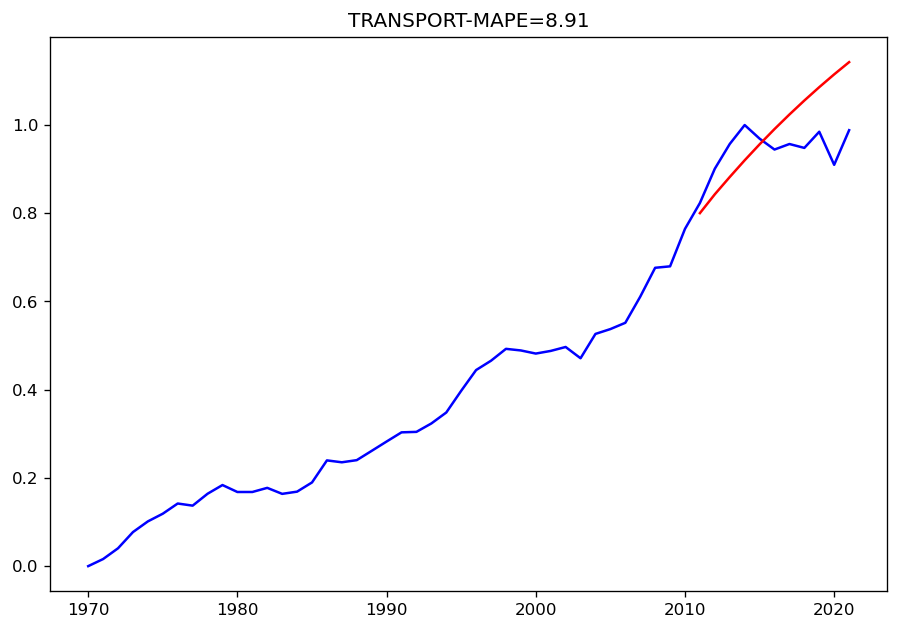

In [41]:
# check with order=(2,1,1)

#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_tr, order=(2,1,1)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())

# prediction

forecast_val = model_fit.predict(start=df_val.index[0], end=df_val.index[-1])

# Create a Pandas DataFrame with the forecasted values and set the index
df_forecast = pd.DataFrame(data=forecast_val, index=df_val.index)

#mape=round(mean_absolute_percentage_error(df_val, df_forecast),2)
mape=MAPE(df_val, df_forecast)
# Plot

plt.plot(df_transport, "b", label= "Actual")
plt.plot(df_forecast, "r", label="Forecast")
plt.title(f'TRANSPORT-MAPE={mape}')


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



Text(0.5, 1.0, 'TRANSPORT-MAPE=16.47')

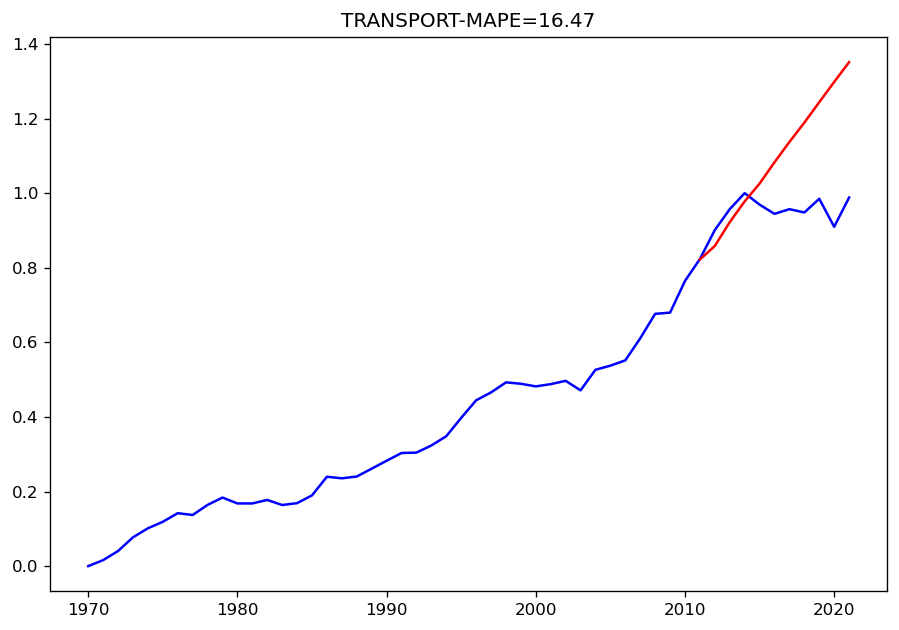

In [42]:
# check with order=(2,2,1)

#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_tr, order=(2,2,1)) 
model_fit = model.fit()
#print(model_fit.summary())
# Prediction

# prediction

forecast_val = model_fit.predict(start=df_val.index[0], end=df_val.index[-1])

# Create a Pandas DataFrame with the forecasted values and set the index
df_forecast = pd.DataFrame(data=forecast_val, index=df_val.index)
mape=MAPE(df_val, df_forecast)
# Plot

plt.plot(df_transport, "b", label= "Actual")
plt.plot(df_forecast, "r", label="Forecast")
plt.title(f"TRANSPORT-MAPE={mape}")



We can observe that $(p,d,q)=(2,1,1)$ returns the better result with  MAPE=5.05% 

### Future forecast (20 more years)

                               SARIMAX Results                                
Dep. Variable:              TRANSPORT   No. Observations:                   52
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 105.902
Date:                Mon, 11 Sep 2023   AIC                           -203.803
Time:                        17:58:27   BIC                           -196.076
Sample:                    01-01-1970   HQIC                          -200.850
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3562      0.352      1.012      0.311      -0.334       1.046
ar.L2          0.4029      0.227      1.776      0.076      -0.042       0.848
ma.L1         -0.2716      0.369     -0.737      0.4

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



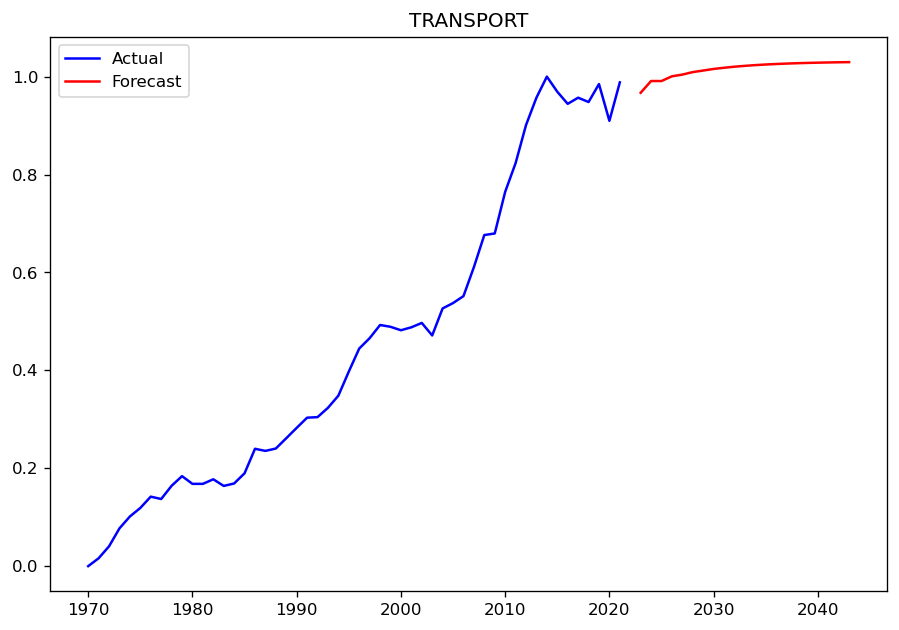

In [43]:
model = ARIMA(df_transport, order=(2,1,1)) #this combination is the best
model_fit = model.fit()
print(model_fit.summary())
warnings.filterwarnings("ignore")
# Specify the number of future steps to forecast
periods = 20  # Adjust as needed
# Specify the start date
start_date = pd.to_datetime('2022-01-01')

# Prediction for future time points
data_pred = model_fit.predict(start=start_date, end=start_date+ pd.DateOffset(years=periods))


# Create a date range for the forecasted period
forecast_index = date_range = pd.date_range(start=start_date, periods=periods+1, freq='A')

# Create a Pandas DataFrame with the forecasted values and set the index
df_forecast = pd.DataFrame(data=list(data_pred), index=forecast_index)

# Plot
plt.plot(df_transport, "b", label="Actual")
plt.plot(df_forecast, "r", label="Forecast")

plt.title("TRANSPORT")
plt.legend()
plt.show()

df_pred_TRANSPORT=df_forecast
df_pred_TRANSPORT.to_excel("pred_TRANSPORT.xlsx")


In [44]:
df_pred_TRANSPORT

0
2022-12-31  0.966990
2023-12-31  0.991037
2024-12-31  0.991019
2025-12-31  1.000700
2026-12-31  1.004142
2027-12-31  1.009268
2028-12-31  1.012480
2029-12-31  1.015690
2030-12-31  1.018128
2031-12-31  1.020289
2032-12-31  1.022041
2033-12-31  1.023536
2034-12-31  1.024775
2035-12-31  1.025818
2036-12-31  1.026689
2037-12-31  1.027419
2038-12-31  1.028030
2039-12-31  1.028542
2040-12-31  1.028971
2041-12-31  1.029330
2042-12-31  1.029630

## How to do Auto Arima Forecast in Python?

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [45]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df= df_transport

model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-195.766, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-174.947, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-194.414, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-176.899, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-194.144, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-194.972, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-194.829, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-194.615, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-197.747, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-199.823, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-196.959, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-196.413, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-

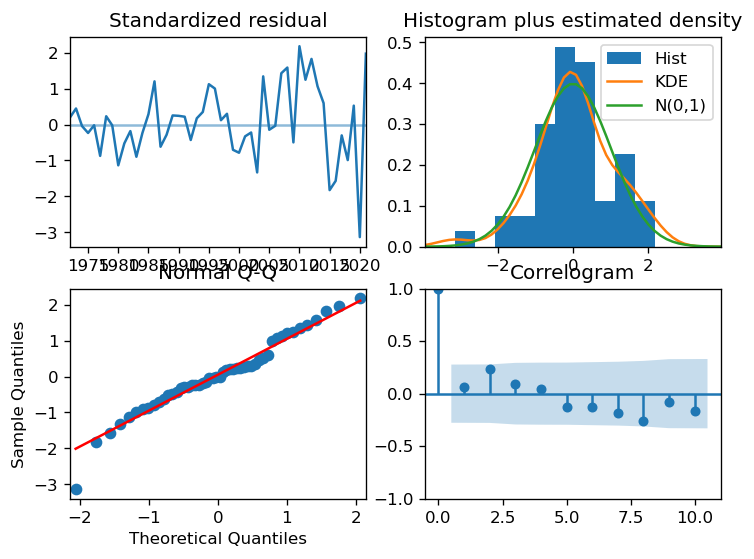

In [46]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

                               SARIMAX Results                                
Dep. Variable:              TRANSPORT   No. Observations:                   41
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  90.225
Date:                Mon, 11 Sep 2023   AIC                           -176.450
Time:                        17:58:29   BIC                           -173.123
Sample:                    01-01-1970   HQIC                          -175.257
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7761      0.107     -7.248      0.000      -0.986      -0.566
sigma2         0.0006      0.000      4.493      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.11   Jarque-

Text(0.5, 1.0, 'TRANSPORT-MAPE=10.65')

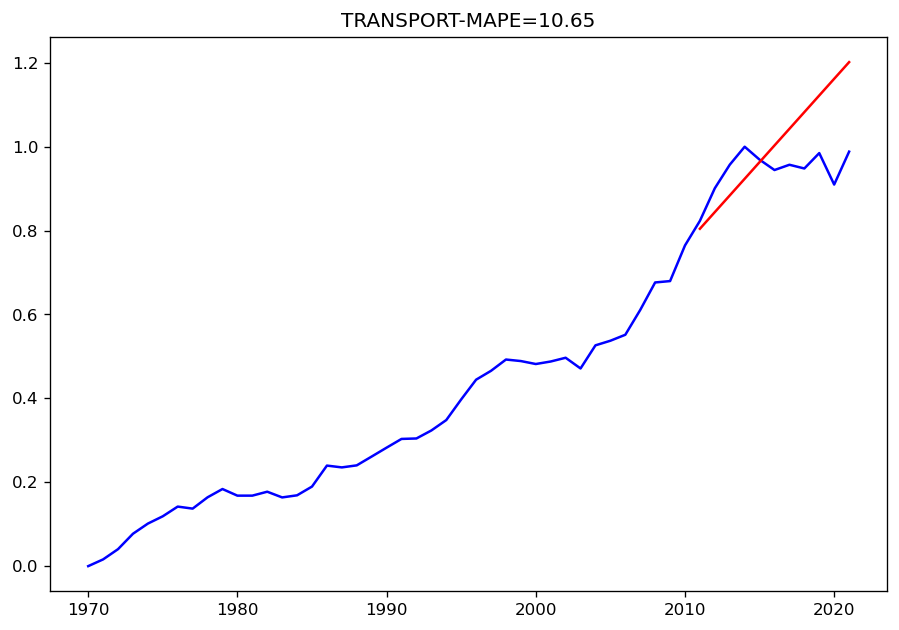

In [47]:
# check with Best model from auto_arima order=(0,2,1)

#fit the arima model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_tr, order=(0,2,1)) 
model_fit = model.fit()
print(model_fit.summary())

# prediction

forecast_val = model_fit.predict(start=df_val.index[0], end=df_val.index[-1])

# Create a Pandas DataFrame with the forecasted values and set the index
df_forecast = pd.DataFrame(data=forecast_val, index=df_val.index)

#mape=round(mean_absolute_percentage_error(df_val, df_forecast),2)
mape=MAPE(df_val, df_forecast)
# Plot

plt.plot(df_transport, "b", label= "Actual")
plt.plot(df_forecast, "r", label="Forecast")
plt.title(f'TRANSPORT-MAPE={mape}')

## II.2. Generate for all sectors

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-195.766, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-174.947, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-194.414, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-176.899, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-194.144, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-194.972, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-194.829, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-194.615, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-197.747, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-199.823, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-196.959, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-196.413, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-

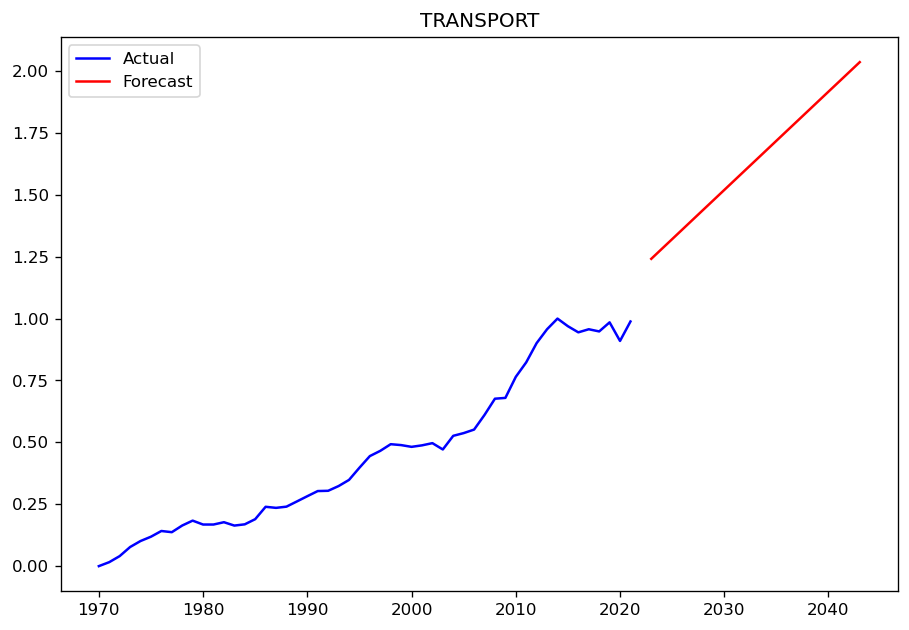

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-186.048, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-163.749, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-167.960, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-165.745, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-188.306, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-182.848, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-186.368, Time=0.12 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-186.340, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-186.195, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-185.543, Time=0.09 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-184.438, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-190.072, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-187.674, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : 

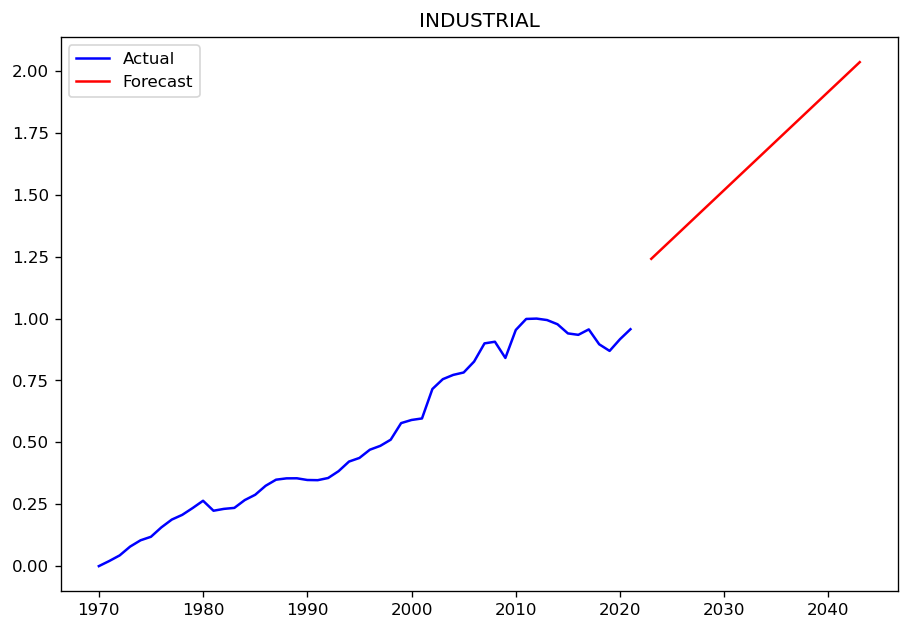

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-152.387, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-152.429, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-152.222, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-152.197, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-151.870, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.183 seconds


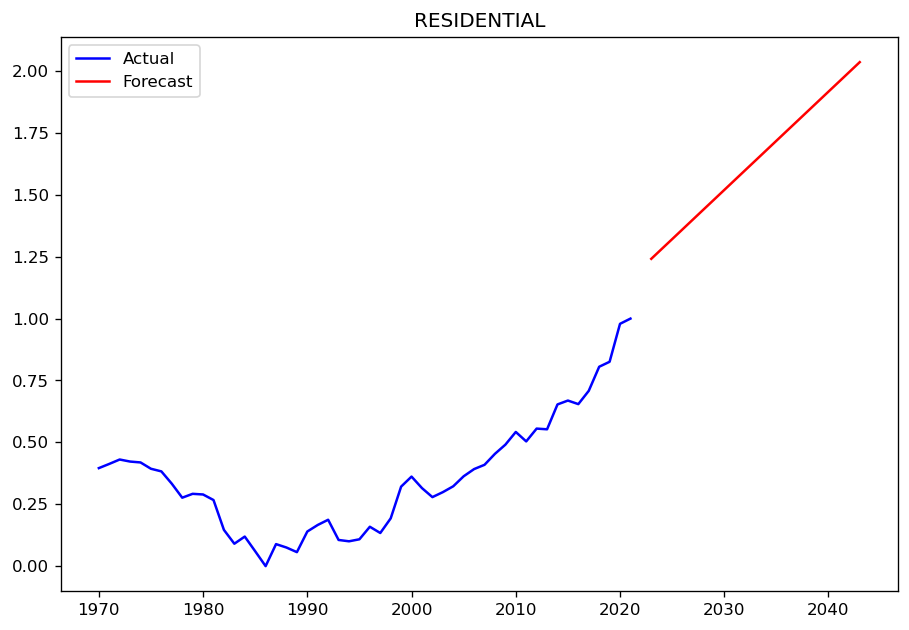

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-223.547, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-195.377, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-216.760, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-225.541, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-197.358, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-223.565, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.506 seconds


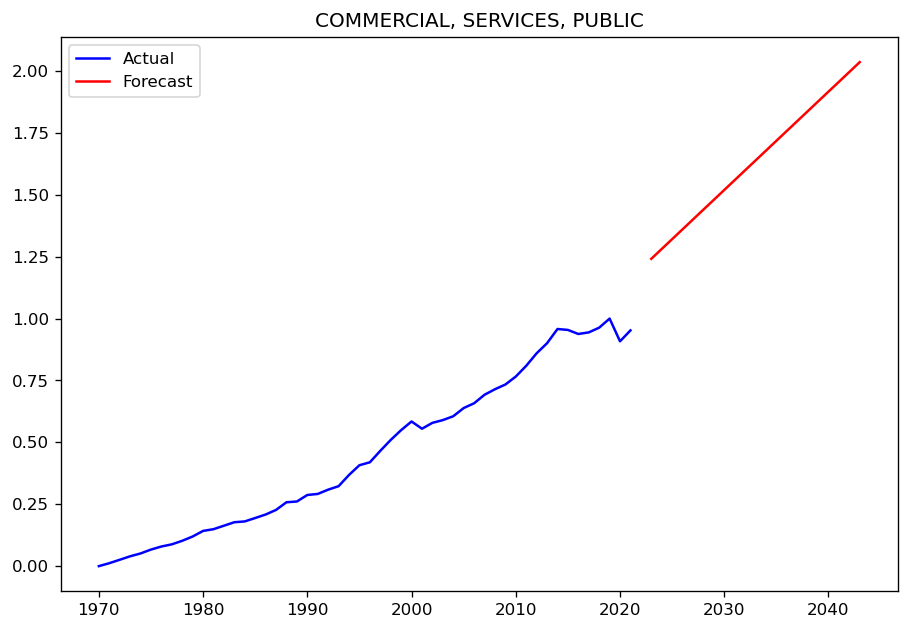

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-105.580, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-117.987, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-141.768, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-107.578, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-142.168, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-141.078, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-141.424, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-119.984, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-139.556, Time=0.09 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.651 seconds


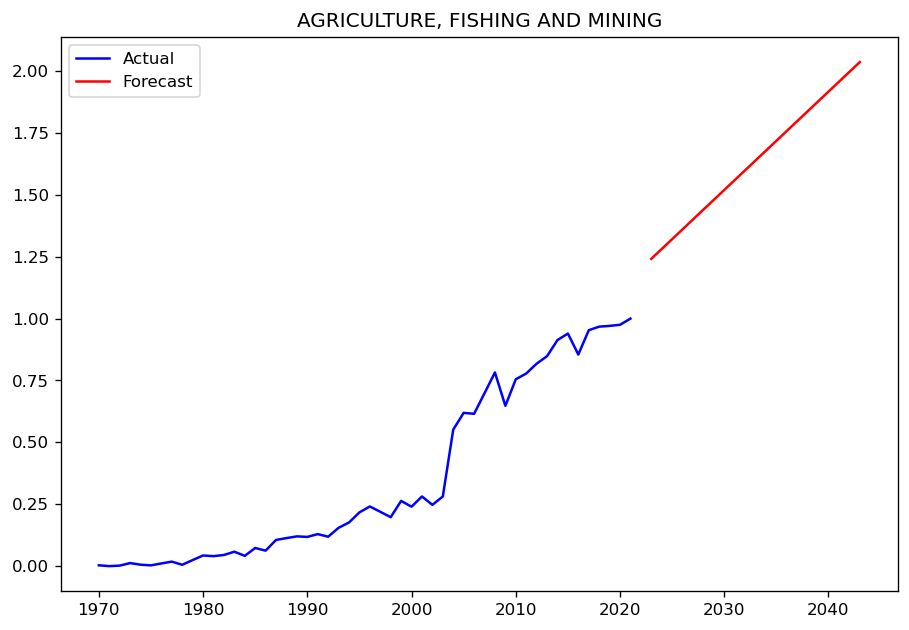

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-18.760, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-15.066, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-16.135, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-15.236, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-16.760, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-16.760, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-15.742, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-16.203, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18.156, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.376 seconds


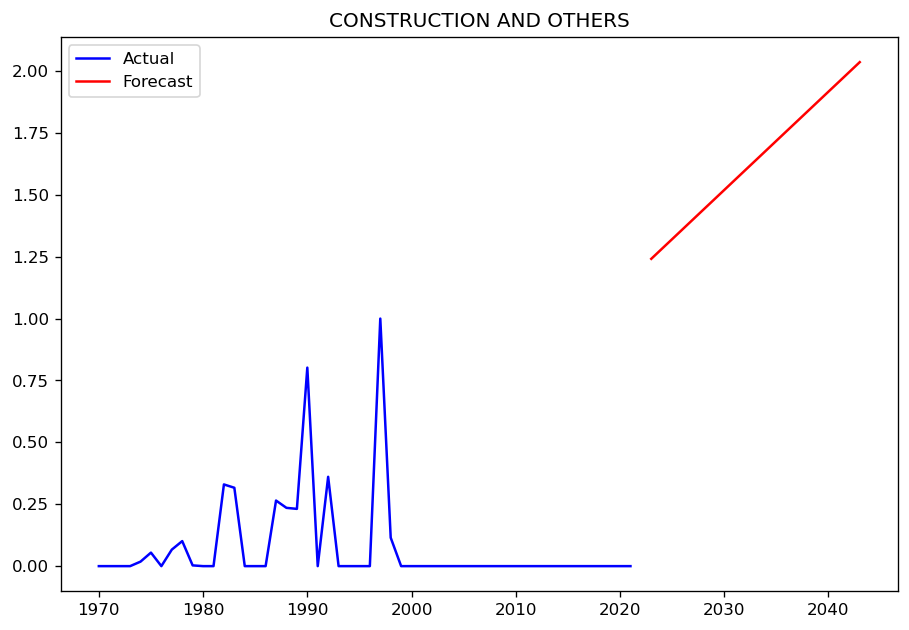

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-93.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-91.618, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-91.621, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-94.195, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.201 seconds


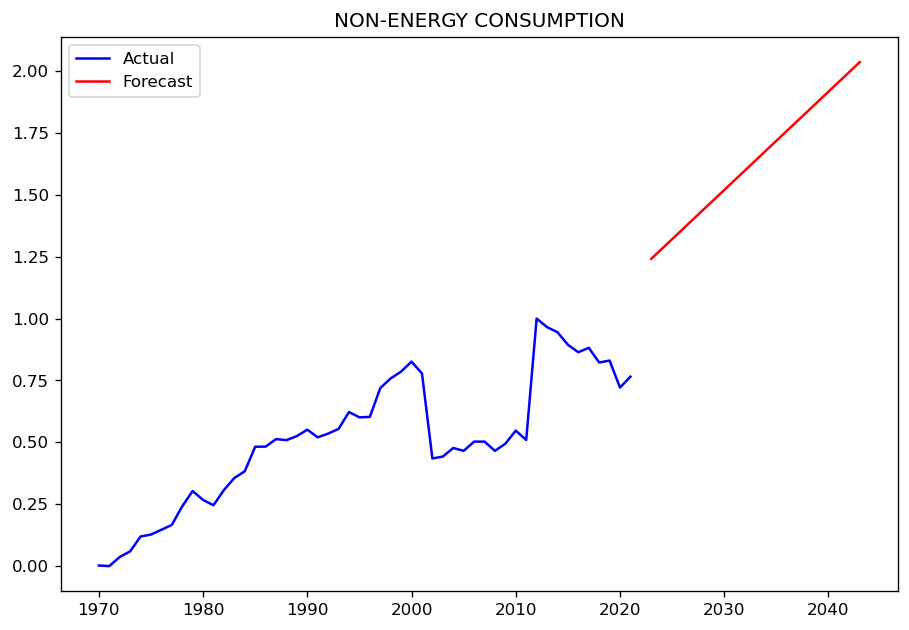

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-197.365, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-214.736, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-199.332, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-213.544, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-216.729, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-215.541, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-221.815, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-220.266, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-217.849, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.740 seconds


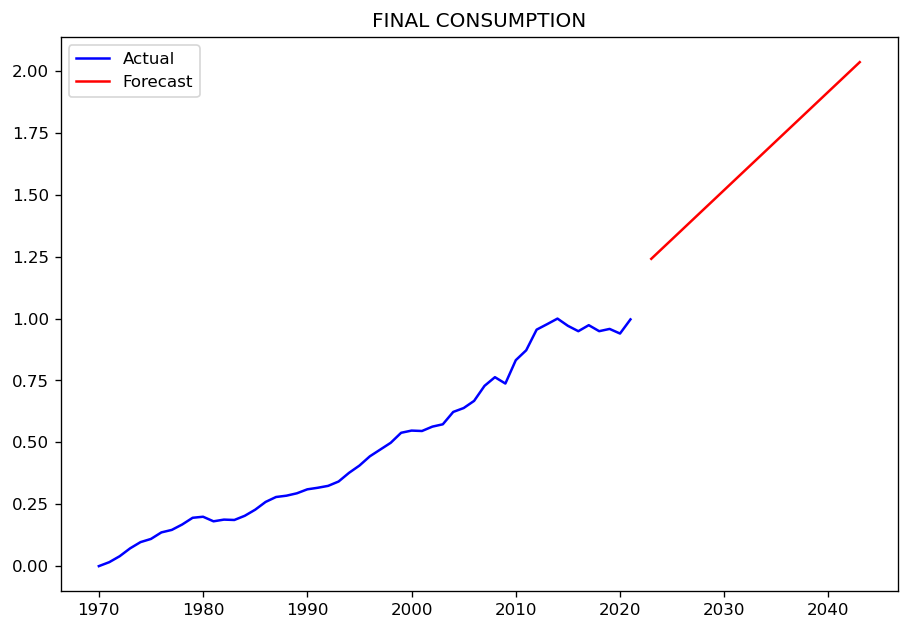

In [48]:

df_C_pred=pd.DataFrame()
for s in scaled_df.columns:
    
    
    # prepare data: 
    df_sector= scaled_df[[s]]
    df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    
    # Build model ARIMA with order=(1,1,1) or (2,1,1)
    ## We can select model here for each sector by including the condition....
    
    #model = ARIMA(df_sector, order=(1,1,1)) #this combination is the best 
    #model_fit = model.fit()
    # Use auto_arima to find the best ARIMA model
    model = pm.auto_arima(df_sector, start_p=1, start_q=1,
                          test='adf',
                          max_p=3, max_q=3,
                          m=1,
                          d=None,
                          seasonal=False,
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
    
    
    
    # Specify the number of future steps to forecast
    periods = 20  # Adjust as needed
    # Specify the start date
    start_date = pd.to_datetime('2022-01-01')

    # Prediction for future time points
    data_pred = model_fit.predict(start=start_date, end=start_date+ pd.DateOffset(years=periods))

    # Create a date range for the forecasted period
    forecast_index = pd.date_range(start=start_date, periods=periods+1, freq='A')

    # Create a Pandas DataFrame with the forecasted values and set the index
    df_forecast = pd.DataFrame(data=list(data_pred), index=forecast_index, columns=[s])

    # Plot
    plt.plot(df_sector, "b", label="Actual")
    plt.plot(df_forecast, "r", label="Forecast")

    plt.title(f"{s}")
    plt.legend()
    plt.show()
    
    #Concatenate df
    df_C_pred=pd.concat([df_C_pred,df_forecast],axis=1)
# Round the values of each column in the dataframe with 2 decimals
df_C_pred = df_C_pred.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)  
df_C_pred.index=df_C_pred.index.year
# Save the df_forecast to excel
file_name='df_C_pred.xlsx'
df_C_pred.to_excel(file_name)

In [49]:
df_C_final=pd.concat([scaled_df, df_C_pred], axis=0)

In [50]:
df_C_final.index=df_C_final.index.astype(int)

# Invert the scaled values in your DataFrame back to the original data
df_C_final = pd.DataFrame(scaler.inverse_transform(df_C_final), columns=df_C_final.columns, index=df_C_final.index)



In [51]:
df_tot = df_C_final.drop("FINAL CONSUMPTION", axis=1).sum(axis=1)
df_C_final['TOT']=df_tot

# Convert values to Mtoe
df_C_final=df_C_final/1000

<AxesSubplot:title={'center':'Prediction FINAL ENERGY CONSUMPTION 20 more years'}, xlabel='Year', ylabel='Values [Mtoe]'>

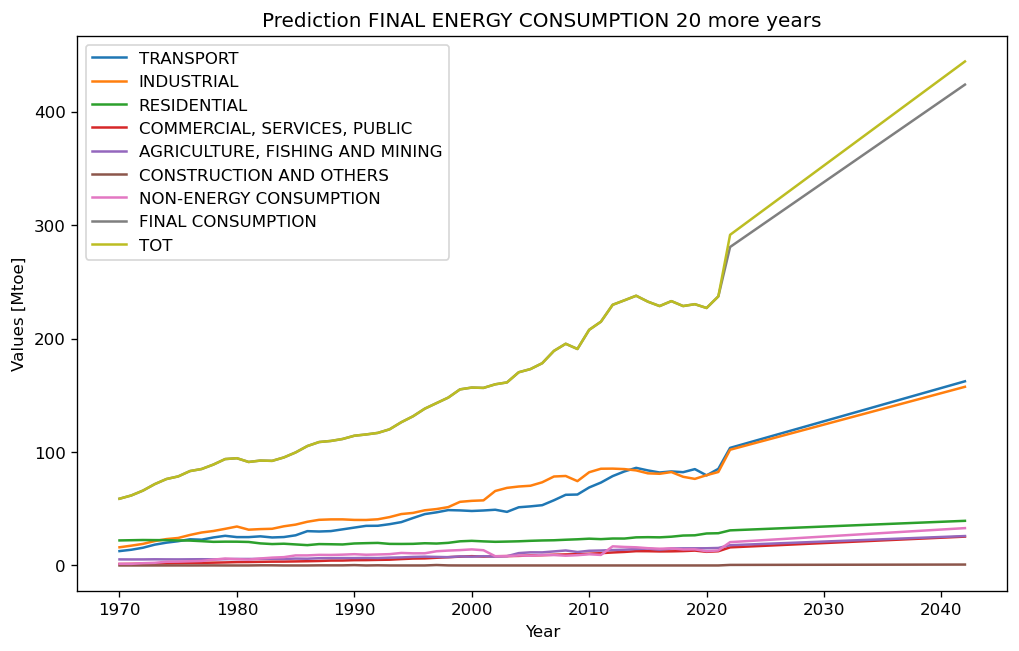

In [52]:
df_C_final.plot(figsize=(10, 6),title= "Prediction FINAL ENERGY CONSUMPTION 20 more years", xlabel= "Year", ylabel="Values [Mtoe]")

In [53]:
val=df_C_final.loc[2025,'FINAL CONSUMPTION'].round(2)
val

302.18

In [54]:
df_C_final=df_C_final.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x) 

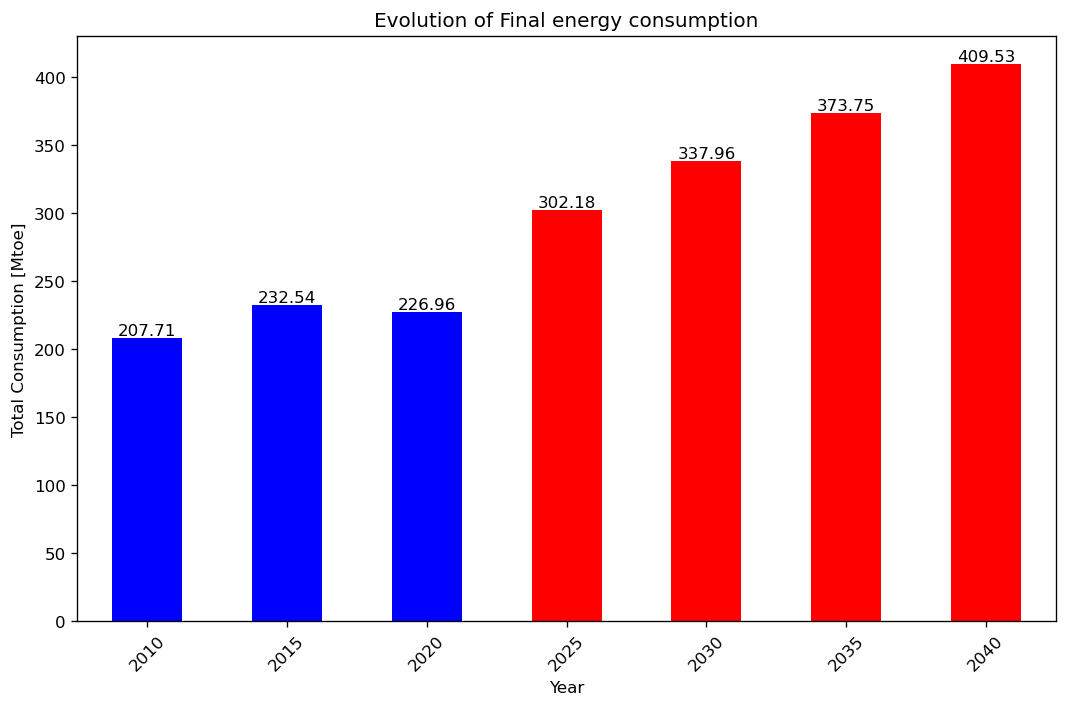

In [55]:

# Filter the DataFrame to include only data for every 5 years
filtered_df = df_C_final[df_C_final.index % 5 == 0]
# Create a bar plot
ax = filtered_df['FINAL CONSUMPTION'][8:].plot(x='Year', y='TOT', kind='bar', color=['b']* (len(filtered_df)-(8+4))  + ['r']*4 )

# Add value annotations to the bars
for index, value in enumerate(filtered_df['FINAL CONSUMPTION'][8:]):
    ax.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Consumption [Mtoe]')
plt.title('Evolution of Final energy consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

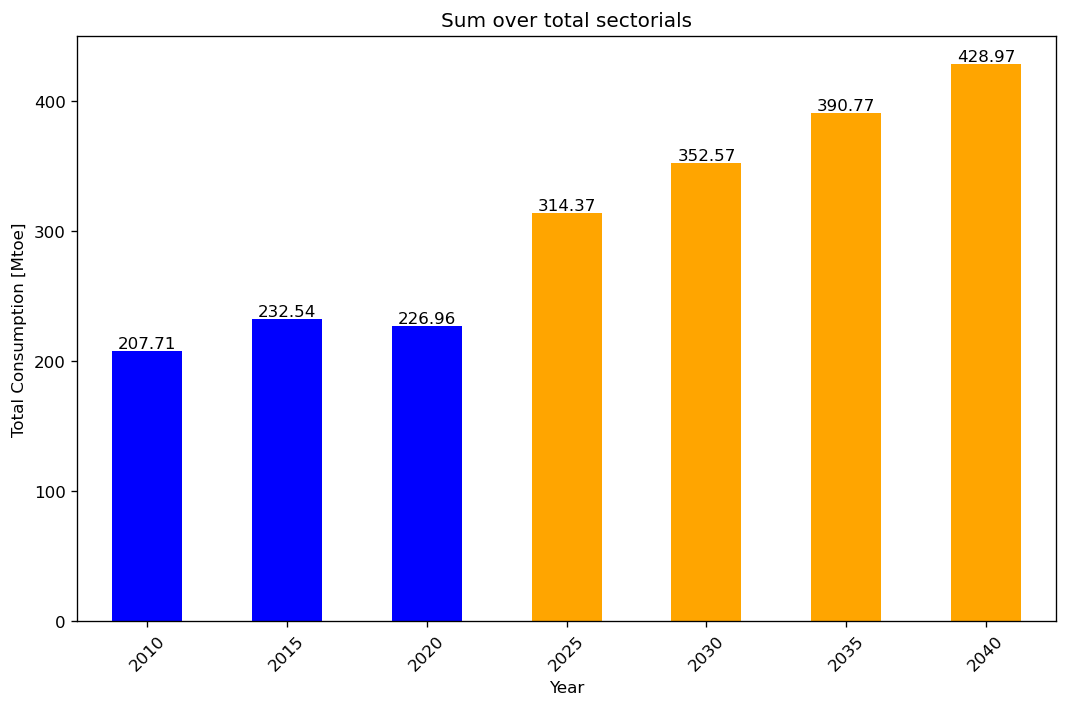

In [56]:
# Filter the DataFrame to include only data for every 5 years
filtered_df = df_C_final[df_C_final.index % 5 == 0]
# Create a bar plot
ax = filtered_df['TOT'][8:].plot(x='Year', y='TOT', kind='bar', color=['b']* (len(filtered_df)-(8+4))  + ['orange']*4 )

# Add value annotations to the bars
for index, value in enumerate(filtered_df['TOT'][8:]):
    ax.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Consumption [Mtoe]')
plt.title('Sum over total sectorials')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

 **Copare with the result in Website: eneroutlook**
 
 https://eneroutlook.enerdata.net/brazil-energy-forecast.html
 
 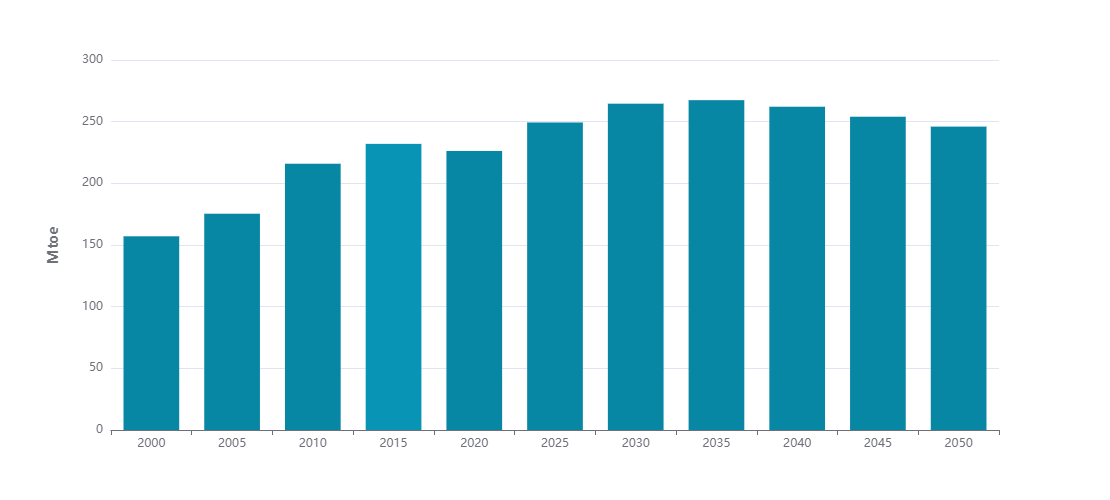
 

# Scenarios:

In [57]:
df_concat.head(3)

SECTOR       OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  \
YEAR                                                                        
1970  PRODUCTION   8161.58      1102.24  1044.43      3421.52         NaN   
1970      IMPORT  17845.05          NaN  1358.47          NaN         NaN   
1970      EXPORT     65.05          NaN      NaN          NaN         NaN   

      NUCLEAR  FIREWOOD  SUGARCANE AND PRODUCTS  OTHER PRIMARY  ...  \
YEAR                                                            ...   
1970      NaN  31851.53                  3600.7         223.24  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL   COKE  CHARCOAL   GASES  \
YEAR                                                                     
1970            1307.21     5674.61   8399.23  55.18   1766.75  465.95   
1970               8.19         NaN       NaN  72.42       NaN     NaN   
1970             122.91       47.15    748.34    NaN       NaN     NaN   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970           321.73      886.77           31068.07  49405.24  
1970              NaN      368.92             937.48  20141.01  
1970              NaN         NaN             920.12    985.17  

[3 rows x 24 columns]

In [58]:
df1=df_concat[df_concat.columns[1:11]]
df1['total1']=df1[df1.columns[:-1]].sum(axis=1)
df1_compare=df1[df1.columns[-2:]]
df1_compare

TOTAL PRIMARIES    total1
YEAR                           
1970         49405.24  49405.24
1970         19203.53  19203.52
1970            65.05     65.05
1970          -444.85   -444.85
1970           922.22    922.22
...               ...       ...
2021          3557.08   3557.09
2021              NaN      0.00
2021         57940.62  57940.62
2021           215.94    215.94
2021         58156.56  58156.56

[1404 rows x 2 columns]

In [59]:
df2=df_concat[df_concat.columns[11:-1]]
df2['total2']=df2[df2.columns[:-1]].sum(axis=1)
df2_compare=df2[df2.columns[-2:]]
df2_compare



TOTAL SECUNDARIES     total2
YEAR                              
1970           31068.07   31068.06
1970             937.48     937.48
1970             920.12     920.12
1970            -345.28    -345.27
1970             106.33     106.33
...                 ...        ...
2021           11864.60   11864.62
2021                NaN       0.00
2021          166016.93  166016.93
2021           13021.03   13021.03
2021          179037.96  179037.96

[1404 rows x 2 columns]

In [60]:
df_concat.SECTOR.unique()

array(['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY', 'REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
       'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
       'DISTILLERIES', 'OTHER CENTERS', 'TOTAL TRANSFORMATION',
       'OWN CONSUMPTION', 'LOSSES', 'ADJUSTMENT', 'TRANSPORT',
       'INDUSTRIAL', 'RESIDENTIAL', 'COMMERCIAL, SERVICES, PUBLIC',
       'AGRICULTURE, FISHING AND MINING', 'CONSTRUCTION AND OTHERS',
       'ENERGY CONSUMPTION', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'], dtype=object)

In [61]:
df_S=df_concat.copy()
selected_SECTORS_S=['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY']

df_S=df_S[df_S['SECTOR'].isin(selected_SECTORS_S)]
df_S = df_S.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_S = df_S.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_S = df_S[selected_SECTORS_S]

# Display the resultdf_summary
df_S.head()

SECTOR  PRODUCTION    IMPORT   EXPORT  STOCK CHANGE   UNUSED  TOTAL SUPPLY
YEAR                                                                      
1970      49405.24  20141.01   985.17       -790.13  1028.54      66742.40
1971      50178.10  23248.45  1269.02      -1348.83   716.67      70092.03
1972      51438.80  28276.61  2651.50      -1323.37   629.20      75111.33
1973      52148.96  37876.93  3533.30      -3735.93   793.22      81963.44
1974      54594.25  37908.01  3484.41       -908.39   481.25      87628.20

<AxesSubplot:xlabel='YEAR'>

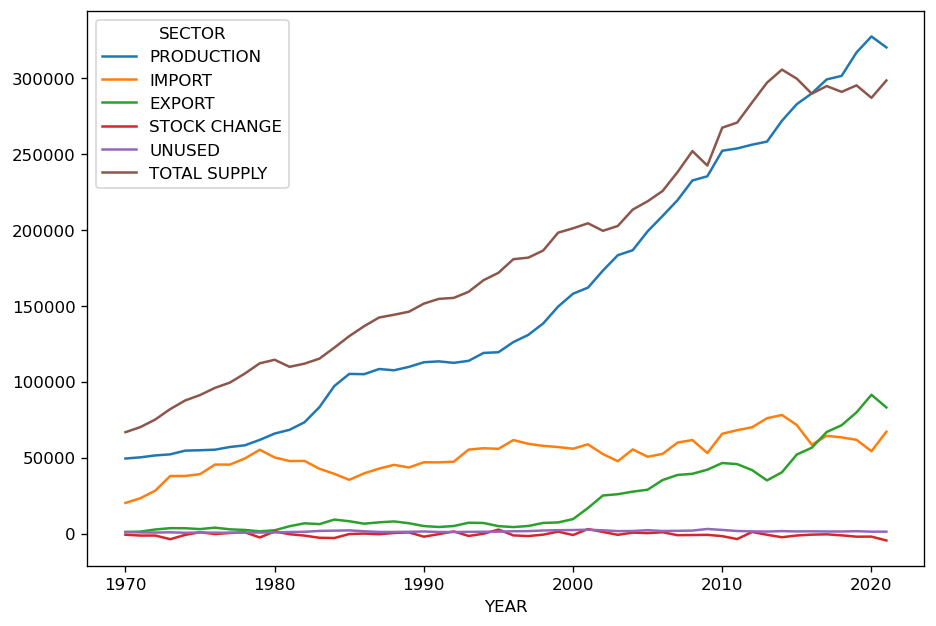

In [62]:
df_S.plot()

In [63]:
df_concat.columns


Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [64]:
final_consumption_data = df_concat[df_concat['SECTOR'] == 'FINAL CONSUMPTION']
final_consumption_data=final_consumption_data.drop(columns=['SECTOR'])
final_consumption_data.columns

Index(['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR',
       'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [65]:
df1=final_consumption_data[final_consumption_data.columns[1:10]]
df1['total1']=df1[df1.columns[:-1]].sum(axis=1)
df1_compare=df1[df1.columns[-2:]]
df1_compare.head()

TOTAL PRIMARIES    total1
YEAR                           
1970         31635.21  31635.22
1971         31374.67  31374.68
1972         31596.50  31596.51
1973         31403.26  31403.26
1974         31085.05  31085.05

In [66]:
df2=final_consumption_data[final_consumption_data.columns[10:-1]]
df2['total2']=df2[df2.columns[:-1]].sum(axis=1)
df2_compare=df2[df2.columns[-2:]]
df2_compare.head()


TOTAL SECUNDARIES    total2
YEAR                             
1970           27198.90  27198.90
1971           30317.01  30317.02
1972           34398.62  34398.62
1973           40289.60  40289.61
1974           45113.35  45113.36

In [67]:
final_consumption_data[['TOTAL PRIMARIES','TOTAL SECUNDARIES','TOTAL']]
final_consumption_data['total12']=final_consumption_data['TOTAL PRIMARIES']+final_consumption_data['TOTAL SECUNDARIES']
final_consumption_data[['total12','TOTAL']]

total12      TOTAL
YEAR                      
1970   58834.11   58834.12
1971   61691.68   61691.69
1972   65995.12   65995.12
1973   71692.86   71692.86
1974   76198.40   76198.40
1975   78491.85   78491.85
1976   83208.97   83208.97
1977   85026.51   85026.52
1978   88944.96   88944.97
1979   93782.09   93782.10
1980   94534.84   94534.85
1981   91232.82   91232.82
1982   92462.42   92462.42
1983   92200.73   92200.73
1984   95222.32   95222.32
1985   99634.72   99634.71
1986  105251.29  105251.29
1987  108807.69  108807.69
1988  109756.68  109756.68
1989  111486.58  111486.58
1990  114351.06  114351.06
1991  115475.10  115475.10
1992  116856.28  116856.28
1993  120002.68  120002.68
1994  126260.73  126260.73
1995  131516.33  131516.33
1996  138211.73  138211.73
1997  143104.84  143104.84
1998  147985.32  147985.31
1999  155221.98  155221.98
2000  156808.59  156808.59
2001  156515.30  156515.30
2002  159678.14  159678.14
2003  161359.71  161359.72
2004  170298.70  170298.70
2005  173105.86  173105.86
2006  178276.74  178276.74
2007  189140.88  189140.88
2008  195412.94  195412.94
2009  190814.83  190814.83
2010  207712.49  207712.48
2011  214859.53  214859.53
2012  229774.08  229774.08
2013  233713.24  233713.25
2014  237763.13  237763.12
2015  232537.06  232537.06
2016  228653.04  228653.04
2017  233004.63  233004.63
2018  228665.38  228665.38
2019  230298.05  230298.05
2020  226959.77  226959.77
2021  237194.52  237194.52

In [68]:
final_consumption_data.columns

Index(['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR',
       'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'total12'],
      dtype='object')

In [69]:
final_consumption_data.head()

OIL  NATURAL GAS   COAL  HYDROENERGY  GEOTHERMAL  NUCLEAR  FIREWOOD  \
YEAR                                                                        
1970  NaN         6.32  82.24          NaN         NaN      NaN  28344.98   
1971  NaN        30.79  87.07          NaN         NaN      NaN  27814.78   
1972  NaN        68.11  88.10          NaN         NaN      NaN  27516.68   
1973  NaN        93.30  70.18          NaN         NaN      NaN  26987.72   
1974  NaN       227.64  99.30          NaN         NaN      NaN  26479.21   

      SUGARCANE AND PRODUCTS  OTHER PRIMARY  TOTAL PRIMARIES  ...  DIESEL OIL  \
YEAR                                                          ...               
1970                 3059.59         142.09         31635.21  ...     5336.83   
1971                 3289.09         152.95         31374.67  ...     5914.66   
1972                 3716.35         207.27         31596.50  ...     6768.56   
1973                 4029.93         222.13         31403.26  ...     8026.25   
1974                 4025.03         253.87         31085.05  ...     8899.86   

      FUEL OIL   COKE  CHARCOAL   GASES  OTHER SECONDARY  NON-ENERGY  \
YEAR                                                                   
1970   5714.24    NaN   1589.82  296.06           105.19     1201.77   
1971   6805.91    NaN   1810.66  308.70           124.87     1173.62   
1972   7441.03    NaN   2098.66  325.40           139.42     1238.57   
1973   9180.71  19.31   2227.16  355.91           154.82     1238.57   
1974  10540.23  20.69   2777.33  362.27           160.69     2002.12   

      TOTAL SECUNDARIES     TOTAL   total12  
YEAR                                         
1970           27198.90  58834.12  58834.11  
1971           30317.01  61691.69  61691.68  
1972           34398.62  65995.12  65995.12  
1973           40289.60  71692.86  71692.86  
1974           45113.35  76198.40  76198.40  

[5 rows x 24 columns]

In [70]:
# Clasify the energy sources:

group_CARBON=['COAL','FIREWOOD','COKE','CHARCOAL']

group_PETROLIUM= ['OIL','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL']

group_NATURAL_GAS=['NATURAL GAS','LPG','GASES']

group_RENEWABLE=['HYDROENERGY','GEOTHERMAL','SUGARCANE AND PRODUCTS']

group_ELECTRICITY= ['ELECTRICITY']

group_NUCLEAR=['NUCLEAR']

group_OTHER=['OTHER PRIMARY','OTHER SECONDARY','NON-ENERGY']

In [80]:
df_=final_consumption_data[group_CARBON].sum(axis=1)
print(df_.head(3))

final_consumption_data[group_CARBON].head(3)

YEAR
1970    30017.04
1971    29712.51
1972    29703.44
dtype: float64


COAL  FIREWOOD  COKE  CHARCOAL
YEAR                                 
1970  82.24  28344.98   NaN   1589.82
1971  87.07  27814.78   NaN   1810.66
1972  88.10  27516.68   NaN   2098.66

In [103]:
df_group=pd.DataFrame()

df_group['CARBON']=final_consumption_data[group_CARBON].sum(axis=1)
df_group['PETROLIUM']=final_consumption_data[group_PETROLIUM].sum(axis=1)
df_group['NATURAL_GAS']=final_consumption_data[group_NATURAL_GAS].sum(axis=1)
df_group['ELECTRICITY']=final_consumption_data[group_ELECTRICITY]
df_group['RENEWABLE']=final_consumption_data[group_RENEWABLE].sum(axis=1)
df_group['NUCLEAR']=final_consumption_data['NUCLEAR']
df_group['OTHER']=final_consumption_data[group_OTHER].sum(axis=1)

<AxesSubplot:xlabel='YEAR'>

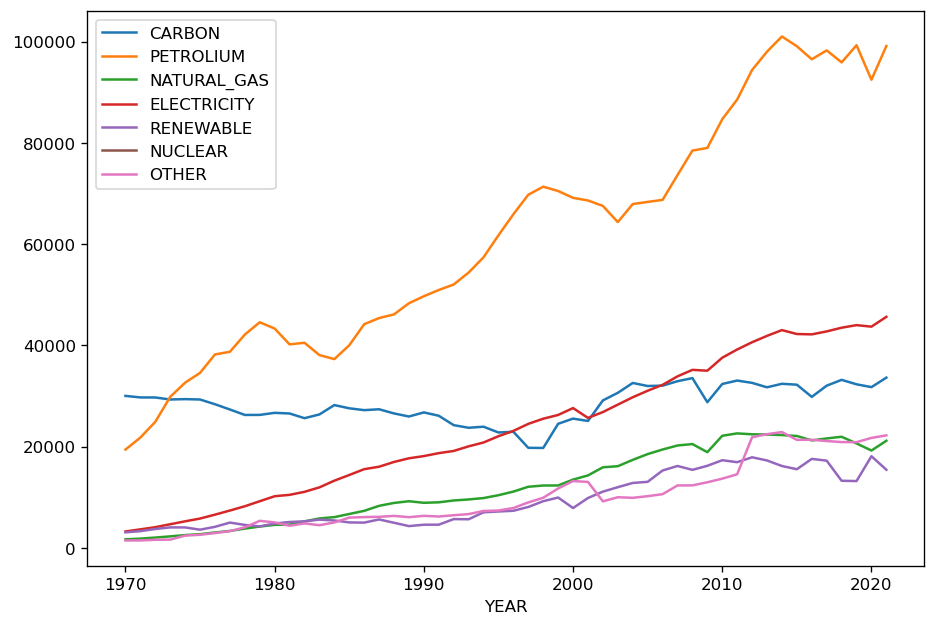

In [104]:
df_group.plot()


In [110]:
df_group_percentages = df_group.div(df_group.sum(axis=1) ,axis=0) * 100
df_group_percentages = df_group_percentages.round(0)
df_group_percentages['TOTAL']=100

df_group_percentages.loc[2009]

CARBON           8.0
PETROLIUM       21.0
NATURAL_GAS      5.0
ELECTRICITY      9.0
RENEWABLE        4.0
NUCLEAR          NaN
OTHER            3.0
TOTAL          100.0
Name: 2009, dtype: float64

In [109]:
#df_group['tot']=df_group.sum(axis=1)
df_group['TOTAL']=final_consumption_data[['TOTAL']]

#inverse data to Mtoe
#df_group=df_group/1000
df_group.loc[2009]

CARBON          28768.87
PETROLIUM       79009.36
NATURAL_GAS     18896.04
ELECTRICITY     34990.68
RENEWABLE       16202.11
NUCLEAR              NaN
OTHER           12947.78
TOTAL          190814.83
Name: 2009, dtype: float64

In [102]:
# Initializing an empty DataFrame for the final combined table
final_df = pd.DataFrame()

# Iterating through each column in the original dataframe
for col in df_group.columns:
    # Constructing the paired data for 'Value' and 'Percentage'
    paired_data = pd.concat([df_group[col], df_group_percentages[col]], axis=1)
    paired_data.columns = pd.MultiIndex.from_product([[col], ['Mtoe', '%']])
    # Adding the paired data to the final dataframe
    final_df = pd.concat([final_df, paired_data.round(2)], axis=1)

final_df

CARBON       PETROLIUM       NATURAL_GAS      ELECTRICITY        \
       Mtoe     %      Mtoe     %        Mtoe    %        Mtoe     %   
YEAR                                                                   
1970   0.03  26.0      0.02  16.0        0.00  1.0        0.00   3.0   
1971   0.03  24.0      0.02  18.0        0.00  1.0        0.00   3.0   
1972   0.03  23.0      0.02  19.0        0.00  2.0        0.00   3.0   
1973   0.03  20.0      0.03  21.0        0.00  2.0        0.00   3.0   
1974   0.03  19.0      0.03  21.0        0.00  2.0        0.01   3.0   
1975   0.03  19.0      0.03  22.0        0.00  2.0        0.01   4.0   
1976   0.03  17.0      0.04  23.0        0.00  2.0        0.01   4.0   
1977   0.03  16.0      0.04  23.0        0.00  2.0        0.01   4.0   
1978   0.03  15.0      0.04  24.0        0.00  2.0        0.01   5.0   
1979   0.03  14.0      0.04  24.0        0.00  2.0        0.01   5.0   
1980   0.03  14.0      0.04  23.0        0.00  2.0        0.01   5.0   
1981   0.03  15.0      0.04  22.0        0.00  3.0        0.01   6.0   
1982   0.03  14.0      0.04  22.0        0.01  3.0        0.01   6.0   
1983   0.03  14.0      0.04  21.0        0.01  3.0        0.01   6.0   
1984   0.03  15.0      0.04  20.0        0.01  3.0        0.01   7.0   
1985   0.03  14.0      0.04  20.0        0.01  3.0        0.01   7.0   
1986   0.03  13.0      0.04  21.0        0.01  3.0        0.02   7.0   
1987   0.03  13.0      0.05  21.0        0.01  4.0        0.02   7.0   
1988   0.03  12.0      0.05  21.0        0.01  4.0        0.02   8.0   
1989   0.03  12.0      0.05  22.0        0.01  4.0        0.02   8.0   
1990   0.03  12.0      0.05  22.0        0.01  4.0        0.02   8.0   
1991   0.03  11.0      0.05  22.0        0.01  4.0        0.02   8.0   
1992   0.02  10.0      0.05  22.0        0.01  4.0        0.02   8.0   
1993   0.02  10.0      0.05  23.0        0.01  4.0        0.02   8.0   
1994   0.02   9.0      0.06  23.0        0.01  4.0        0.02   8.0   
1995   0.02   9.0      0.06  23.0        0.01  4.0        0.02   8.0   
1996   0.02   8.0      0.07  24.0        0.01  4.0        0.02   8.0   
1997   0.02   7.0      0.07  24.0        0.01  4.0        0.02   9.0   
1998   0.02   7.0      0.07  24.0        0.01  4.0        0.03   9.0   
1999   0.02   8.0      0.07  23.0        0.01  4.0        0.03   8.0   
2000   0.03   8.0      0.07  22.0        0.01  4.0        0.03   9.0   
2001   0.03   8.0      0.07  22.0        0.01  5.0        0.03   8.0   
2002   0.03   9.0      0.07  21.0        0.02  5.0        0.03   8.0   
2003   0.03   9.0      0.06  20.0        0.02  5.0        0.03   9.0   
2004   0.03  10.0      0.07  20.0        0.02  5.0        0.03   9.0   
2005   0.03   9.0      0.07  20.0        0.02  5.0        0.03   9.0   
2006   0.03   9.0      0.07  19.0        0.02  5.0        0.03   9.0   
2007   0.03   9.0      0.07  19.0        0.02  5.0        0.03   9.0   
2008   0.03   9.0      0.08  20.0        0.02  5.0        0.04   9.0   
2009   0.03   8.0      0.08  21.0        0.02  5.0        0.03   9.0   
2010   0.03   8.0      0.08  20.0        0.02  5.0        0.04   9.0   
2011   0.03   8.0      0.09  21.0        0.02  5.0        0.04   9.0   
2012   0.03   7.0      0.09  21.0        0.02  5.0        0.04   9.0   
2013   0.03   7.0      0.10  21.0        0.02  5.0        0.04   9.0   
2014   0.03   7.0      0.10  21.0        0.02  5.0        0.04   9.0   
2015   0.03   7.0      0.10  21.0        0.02  5.0        0.04   9.0   
2016   0.03   7.0      0.10  21.0        0.02  5.0        0.04   9.0   
2017   0.03   7.0      0.10  21.0        0.02  5.0        0.04   9.0   
2018   0.03   7.0      0.10  21.0        0.02  5.0        0.04  10.0   
2019   0.03   7.0      0.10  22.0        0.02  4.0        0.04  10.0   
2020   0.03   7.0      0.09  20.0        0.02  4.0        0.04  10.0   
2021   0.03   7.0      0.10  21.0        0.02  4.0        0.05  10.0   

     RENEWABLE      NUCLEAR     OTHER       